# Polynomial Regression and its degrees

## Definition
In polynomial regression, a polynomial function is used to approximate the relationship between the variables. This means that instead of fitting a straight line to the data, as is done in simple linear regression, a higher degree polynomial function is used, allowing for more flexibility in the fit of the line. This results in higher accuracy when predicting values.

## Pros and Cons

### Pros of Polynomial Regression:

Flexibility: Polynomial regression can model complex and nonlinear relationships between variables. This flexibility allows the model to fit a wide range of data patterns and can provide a better fit than other types of regression models.

Higher accuracy: Polynomial regression can provide a more accurate fit to the data than linear regression if the relationship between the variables is nonlinear.

Interpretability: Polynomial regression models are relatively easy to interpret and can provide insights into the relationship between the variables.

### Cons of Polynomial Regression:

Overfitting: If the degree of the polynomial function is too high, the model may overfit the data, meaning that it captures noise in the data rather than the underlying relationship between the variables.

Extrapolation: Polynomial regression models are not suitable for extrapolation beyond the range of the observed data because they are not constrained to follow a specific function outside the range of the data.

Computational complexity: Polynomial regression models can be computationally intensive, especially for higher degree polynomial functions, which may require a lot of computation time and resources.

## Import libraries

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

## Import Cleaned Dataset

In [64]:
dataset = pd.read_csv('CleanedLifeExpectancy.csv')
dataset.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62.000000,0.010000,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,3.373649e+07,17.2,17.3,0.479,10.1
1,Albania,2015,Developing,77.8,74.0,35.129032,4.600000,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,2.887300e+04,1.2,1.3,0.762,14.2
2,Algeria,2015,Developing,75.6,19.0,21.000000,5.288333,0.000000,95.0,63,...,95.0,7.08,95.0,0.1,4132.762920,3.987153e+07,6.0,5.8,0.743,14.4
3,Angola,2015,Developing,52.4,335.0,66.000000,5.288333,0.000000,64.0,118,...,7.0,7.08,64.0,1.9,3695.793748,2.785935e+06,8.3,8.2,0.531,11.4
4,Antigua and Barbuda,2015,Developing,76.4,13.0,35.129032,5.288333,0.000000,99.0,0,...,86.0,7.08,99.0,0.2,13566.954100,1.109741e+07,3.3,3.3,0.784,13.9


## Pick variable to use

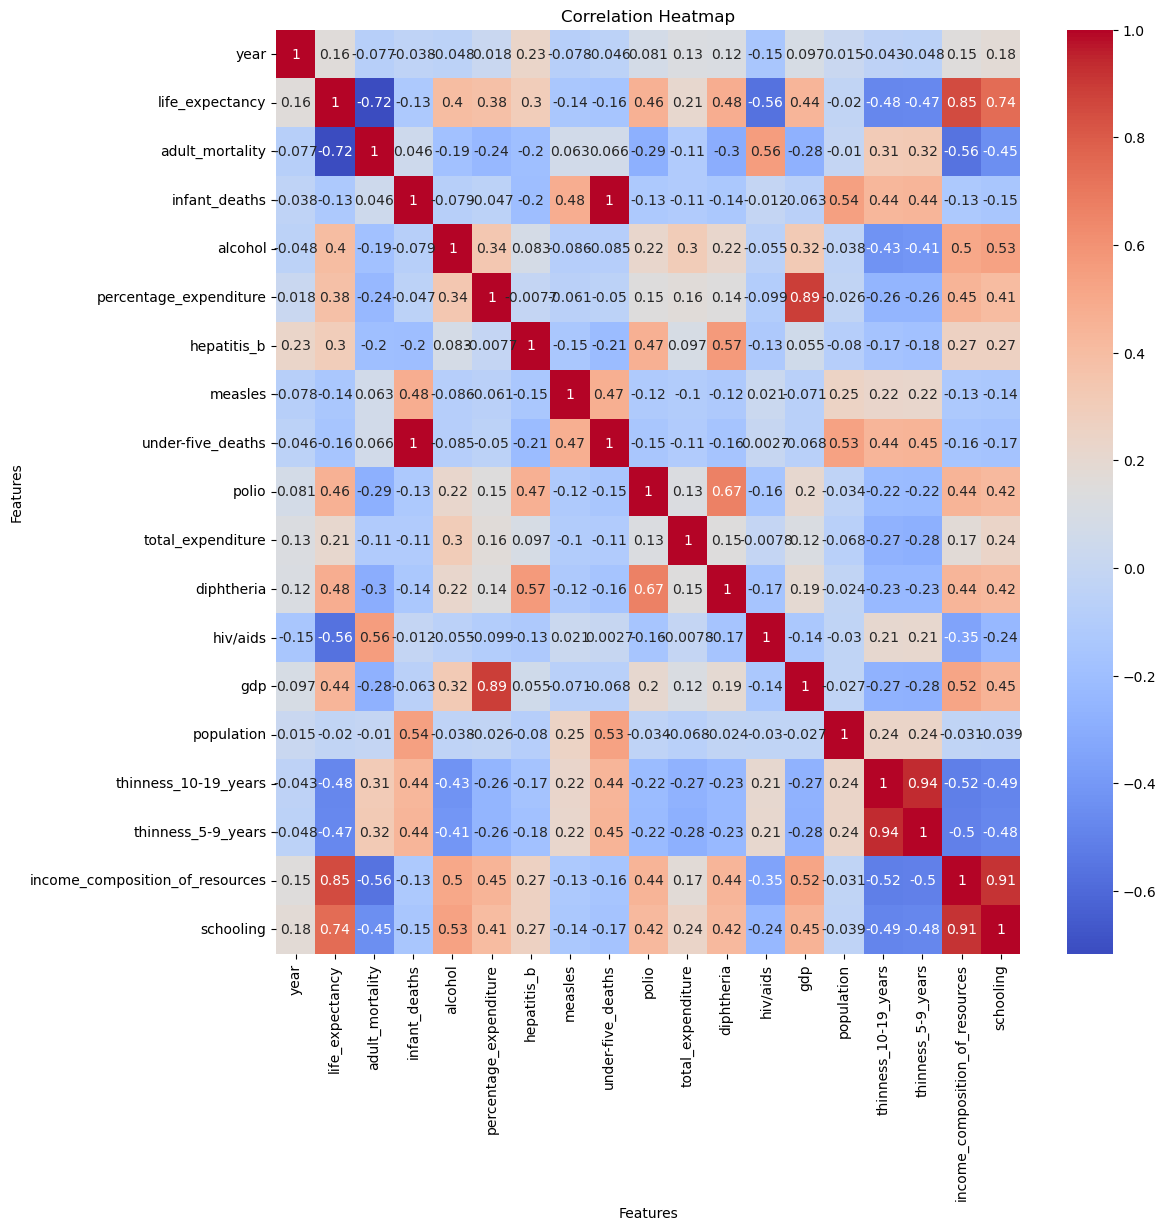

In [83]:
# Compute correlation matrix
corr = dataset.corr()

f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr, cmap='coolwarm', annot=True, ax=ax)



# Add labels and title
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

Income Composition of resources has the highest corrolation at 0.85, lets try to predict it.

## Polynomial Regression: Degree comparison

Different Degrees of polynomial regression is used to check if it is fitted correctly.

#### y = b0 + b1*x + b2*x^2 + b3*x^3 + ...

Degrees of 2, 4 and 5 are tested here.

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


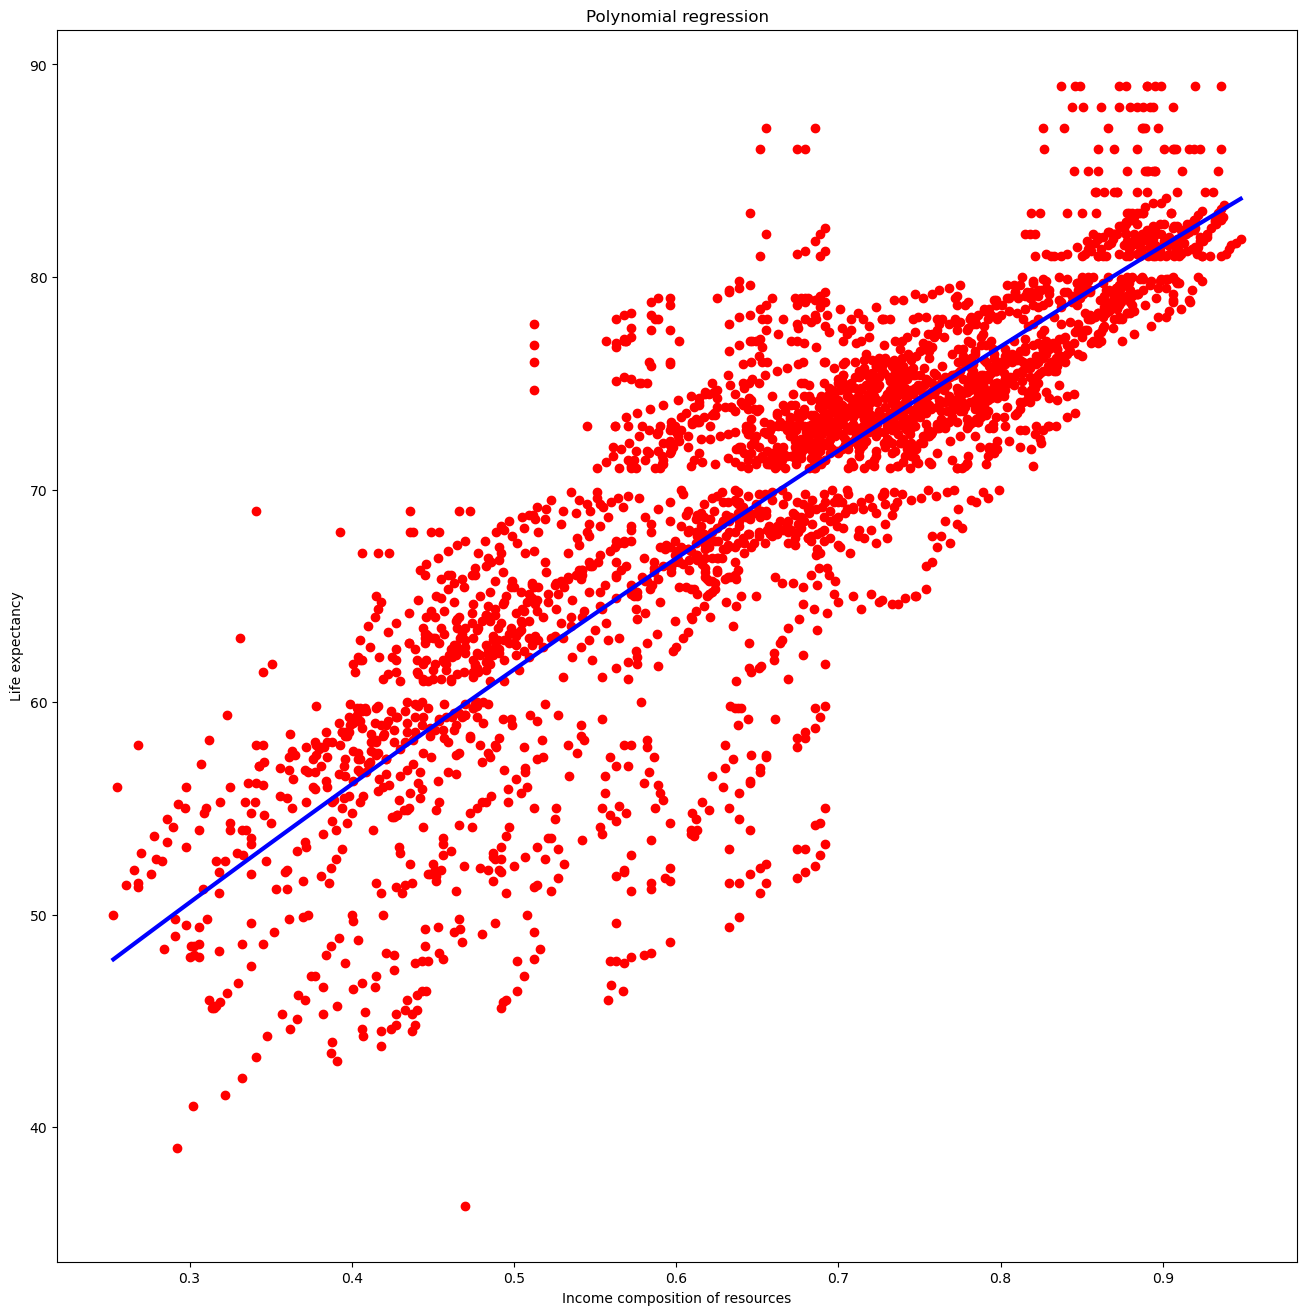

In [84]:
# DEGREE OF 2

ICR = pd.DataFrame(dataset["income_composition_of_resources"])
LE = pd.DataFrame(dataset["life_expectancy"])

poly_reg = PolynomialFeatures(degree=2)
ICR_poly = poly_reg.fit_transform(ICR)
lin_reg_p = LinearRegression()
lin_reg_p.fit(ICR_poly, LE)

# Visualize the results
f, axes = plt.subplots(1, 1, figsize=(16, 16))

# Scatter plot of input and output variables
plt.scatter(ICR, LE, color='red')

# Create a range of values for the x-axis
x_range = np.linspace(ICR.min(), ICR.max(), 100).reshape(-1, 1)

# Transform the range of x-values into polynomial features
x_range_poly = poly_reg.transform(x_range)

# Predict the corresponding y-values using the trained model
y_range_pred = lin_reg_p.predict(x_range_poly)

# Plot the polynomial regression line
plt.plot(x_range, y_range_pred, color='blue', linewidth=3)

plt.title('Polynomial regression')
plt.ylabel('Life expectancy')
plt.xlabel('Income composition of resources')
plt.show()

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


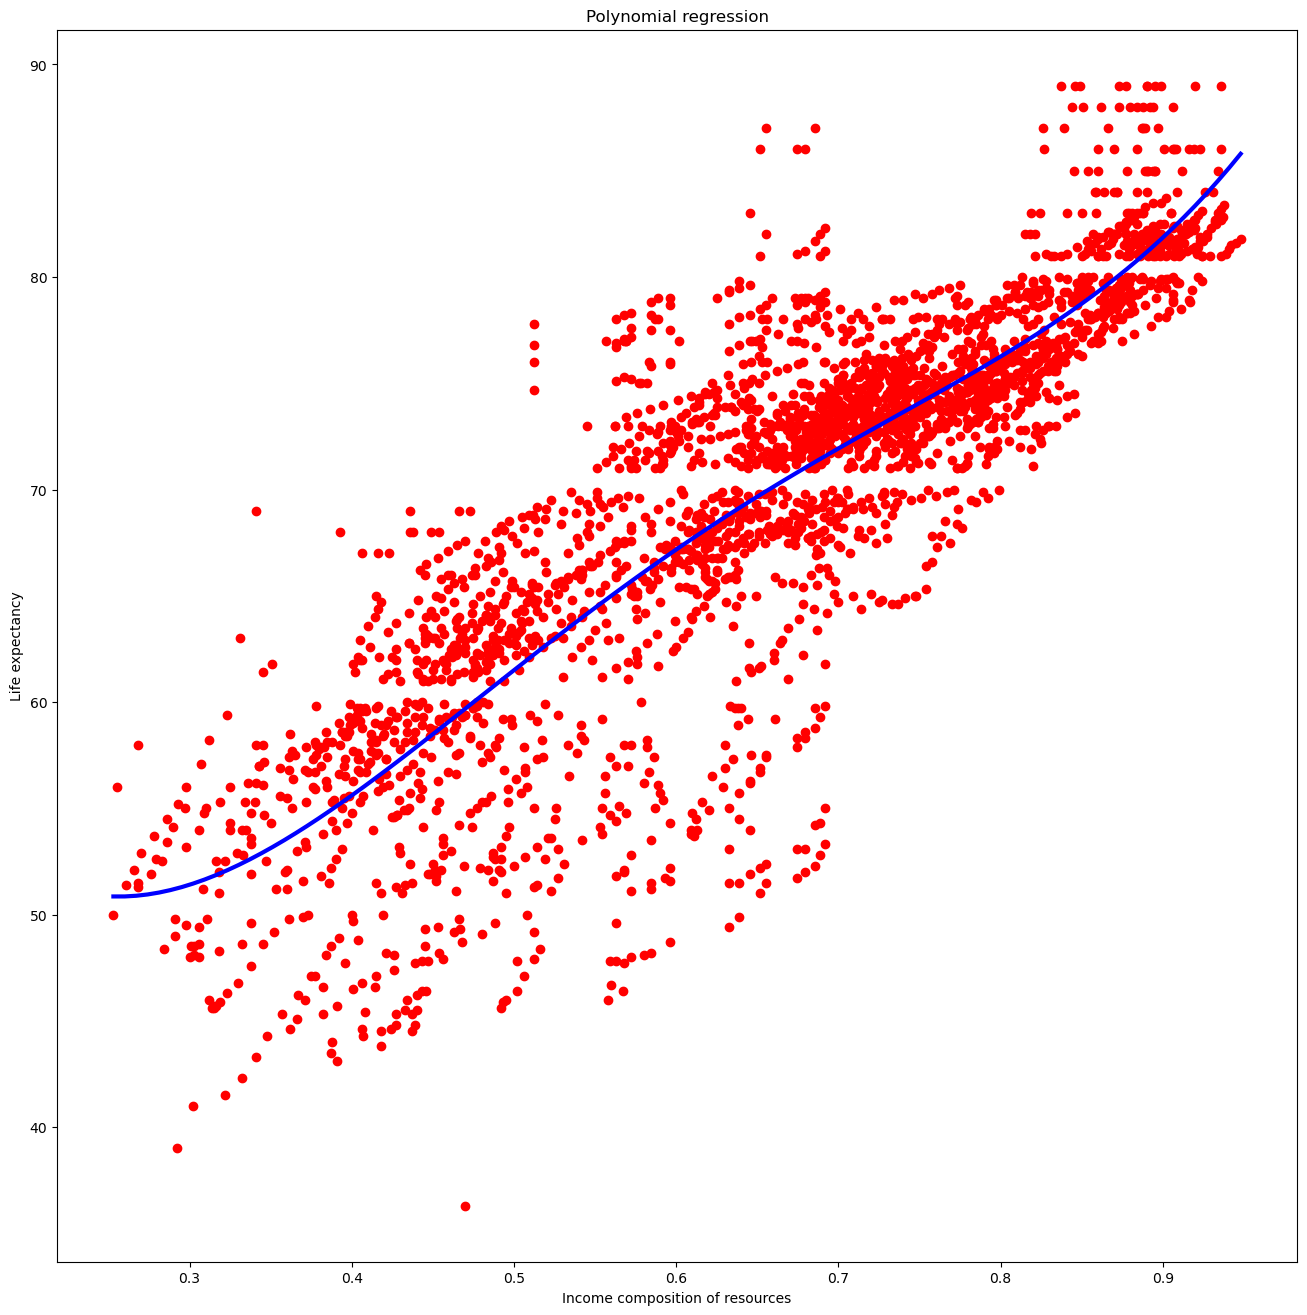

In [72]:
# DEGREE OF 4

ICR = pd.DataFrame(dataset["income_composition_of_resources"])
LE = pd.DataFrame(dataset["life_expectancy"])

poly_reg = PolynomialFeatures(degree=4)
ICR_poly = poly_reg.fit_transform(ICR)
lin_reg_p = LinearRegression()
lin_reg_p.fit(ICR_poly, LE)

# Visualize the results
f, axes = plt.subplots(1, 1, figsize=(16, 16))

# Scatter plot of input and output variables
plt.scatter(ICR, LE, color='red')

# Create a range of values for the x-axis
x_range = np.linspace(ICR.min(), ICR.max(), 100).reshape(-1, 1)

# Transform the range of x-values into polynomial features
x_range_poly = poly_reg.transform(x_range)

# Predict the corresponding y-values using the trained model
y_range_pred = lin_reg_p.predict(x_range_poly)

# Plot the polynomial regression line
plt.plot(x_range, y_range_pred, color='blue', linewidth=3)

plt.title('Polynomial regression')
plt.ylabel('Life expectancy')
plt.xlabel('Income composition of resources')
plt.show()

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


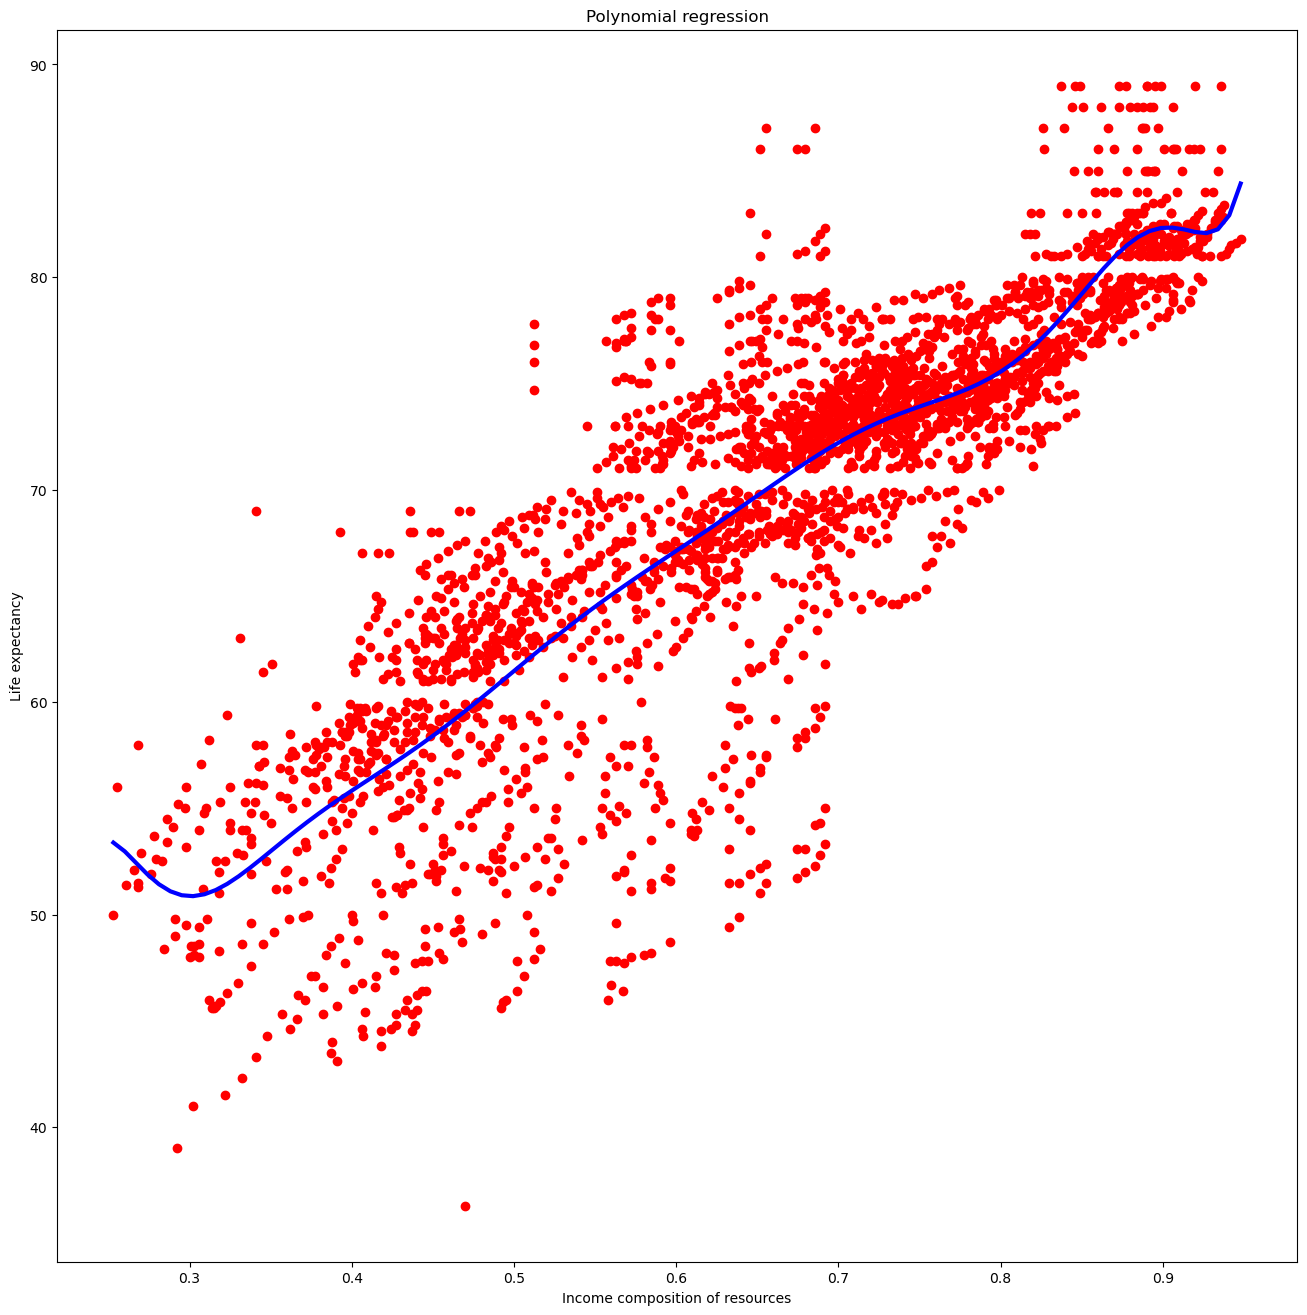

In [61]:
# DEGREE OF 12

ICR = pd.DataFrame(dataset["income_composition_of_resources"])
LE = pd.DataFrame(dataset["life_expectancy"])

poly_reg = PolynomialFeatures(degree=12)
ICR_poly = poly_reg.fit_transform(ICR)
lin_reg_p = LinearRegression()
lin_reg_p.fit(ICR_poly, LE)

# Visualize the results
f, axes = plt.subplots(1, 1, figsize=(16, 16))

# Scatter plot of input and output variables
plt.scatter(ICR, LE, color='red')

# Create a range of values for the x-axis
x_range = np.linspace(ICR.min(), ICR.max(), 100).reshape(-1, 1)

# Transform the range of x-values into polynomial features
x_range_poly = poly_reg.transform(x_range)

# Predict the corresponding y-values using the trained model
y_range_pred = lin_reg_p.predict(x_range_poly)

# Plot the polynomial regression line
plt.plot(x_range, y_range_pred, color='blue', linewidth=3)

plt.title('Polynomial regression')
plt.ylabel('Life expectancy')
plt.xlabel('Income composition of resources')
plt.show()

### Comparing the Polynomial Regression Line between degree of 2,4 & 5:

Degree 2:

Very close to a straight line
Clearly underfitted

Degree 4:

More prominent curves along the line
Adequately fitted

Degree 12:

Very prominent curve at beginning and end of line shows alot of overfitting present

### Importance of degree: 

Ensuring the degree use is reasonable is important 
as both underfitting (Degree 2) and overfitting (Degree 5) would lead to incaccurate predictions.


Underfitting occurs when a model is too simple and cannot capture the underlying patterns in the data, resulting in poor performance on both the training and test data. This means that the model is not complex enough to accurately capture the relationships between the input features and the target variable. In other words, the model is too generalized and oversimplifies the data.

Overfitting occurs when a model is too complex and captures the noise or random fluctuations in the data, resulting in high performance on the training data but poor performance on the test data. 


### But if overfitting is closer to the actual data, does that mean its more accurate ?

Let's compare the training and testing of degrees 2 vs 4 vs 12.

# Training and testing with Degrees 2,4 & 12

In [77]:
# Split the Dataset into Train and Test here to ensure all degrees have same splitted datasets
X_train, X_test, y_train, y_test = train_test_split(ICR, LE, test_size = 0.25)

Intercept of Regression 	: b =  [32.82796519]
Coefficients of Regression 	: a =  [[ 0.         62.14089887 -8.97524647]]

                          Predictors  Coefficients
0                                  1      0.000000
1    income_composition_of_resources     62.140899
2  income_composition_of_resources^2     -8.975246



C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


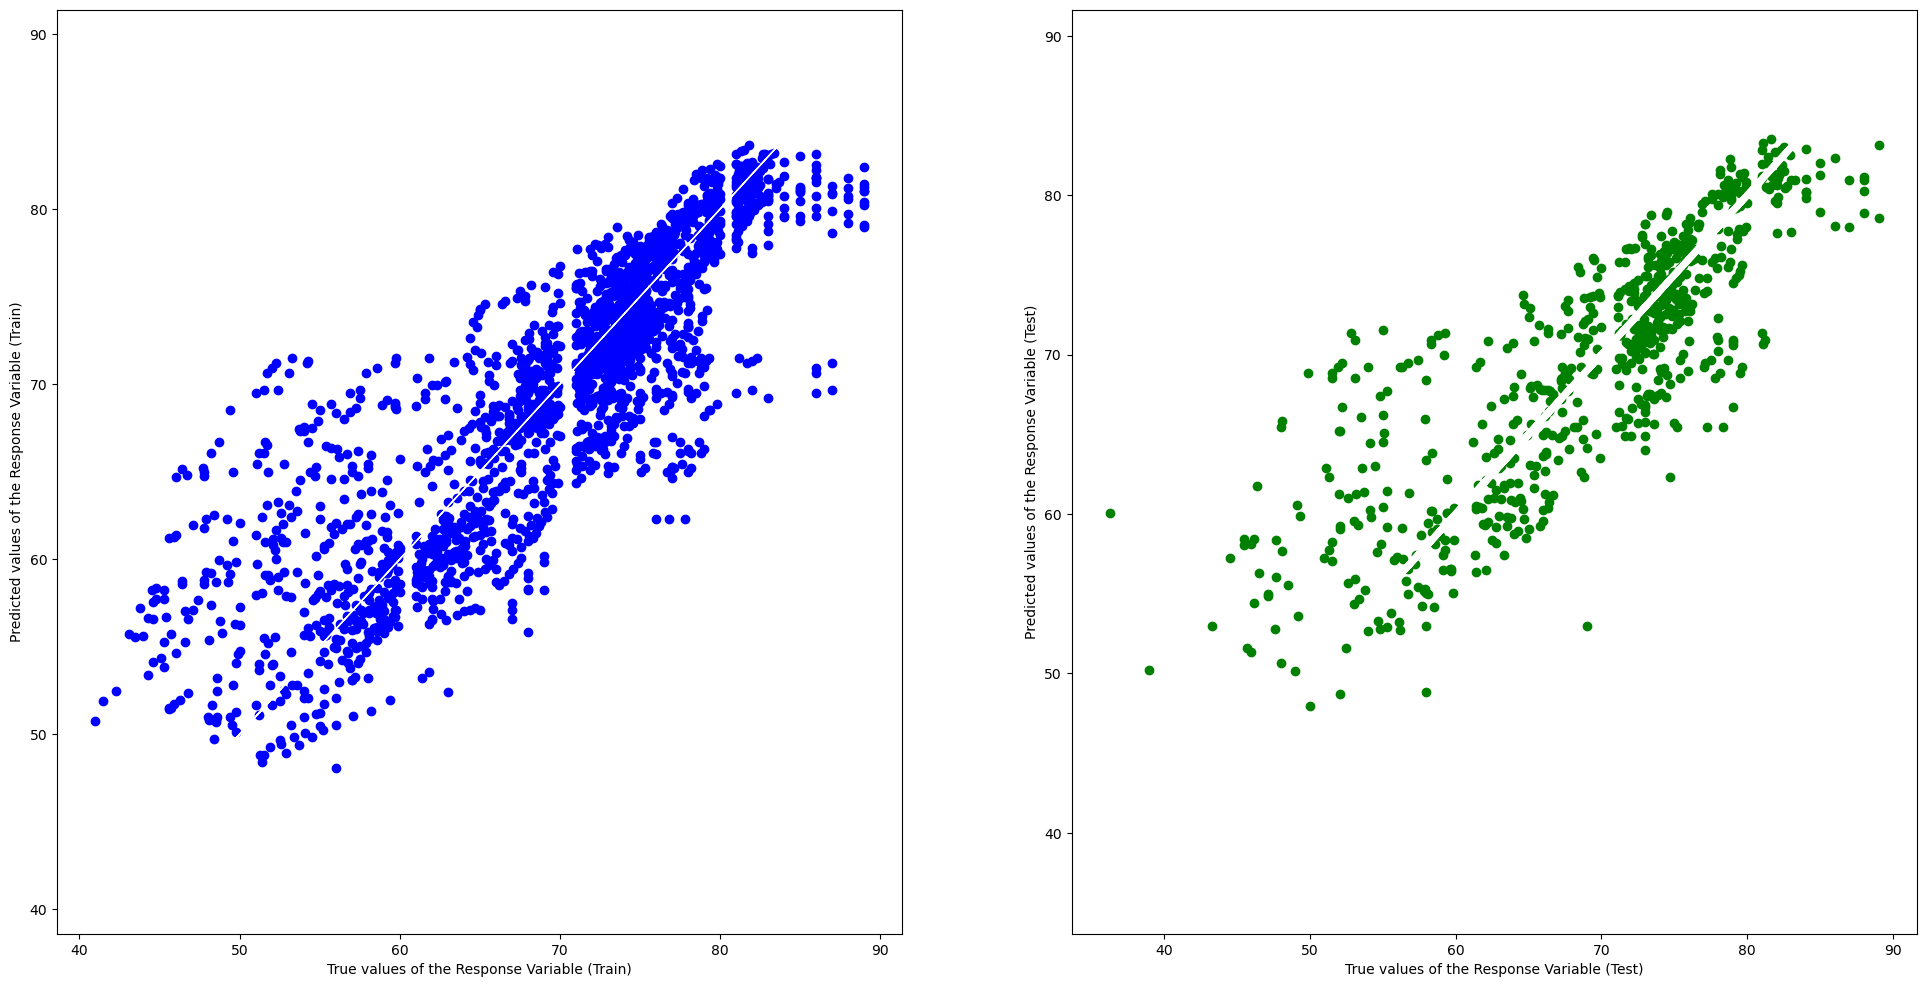

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7318743400914203
Mean Squared Error (MSE) 	: 24.114668294704973

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6938166193559875
Mean Squared Error (MSE) 	: 27.536008175728856



In [78]:
# DEGREE OF 2
# Polynomial Regression using Train Data
poly = PolynomialFeatures(degree=2)

X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)

linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_poly_train, y_train)        # train the linear regression model

# Coefficients of the Polynomial Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
poly_predictors = poly.get_feature_names(X_train.columns)
print(pd.DataFrame(list(zip(poly_predictors, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_poly_train)
y_test_pred = linreg.predict(X_poly_test)


# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_poly_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_poly_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Intercept of Regression 	: b =  [89.02670875]
Coefficients of Regression 	: a =  [[    0.          -359.45727919  1119.86284229 -1284.71174639
    527.10742205]]

                          Predictors  Coefficients
0                                  1      0.000000
1    income_composition_of_resources   -359.457279
2  income_composition_of_resources^2   1119.862842
3  income_composition_of_resources^3  -1284.711746
4  income_composition_of_resources^4    527.107422



C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


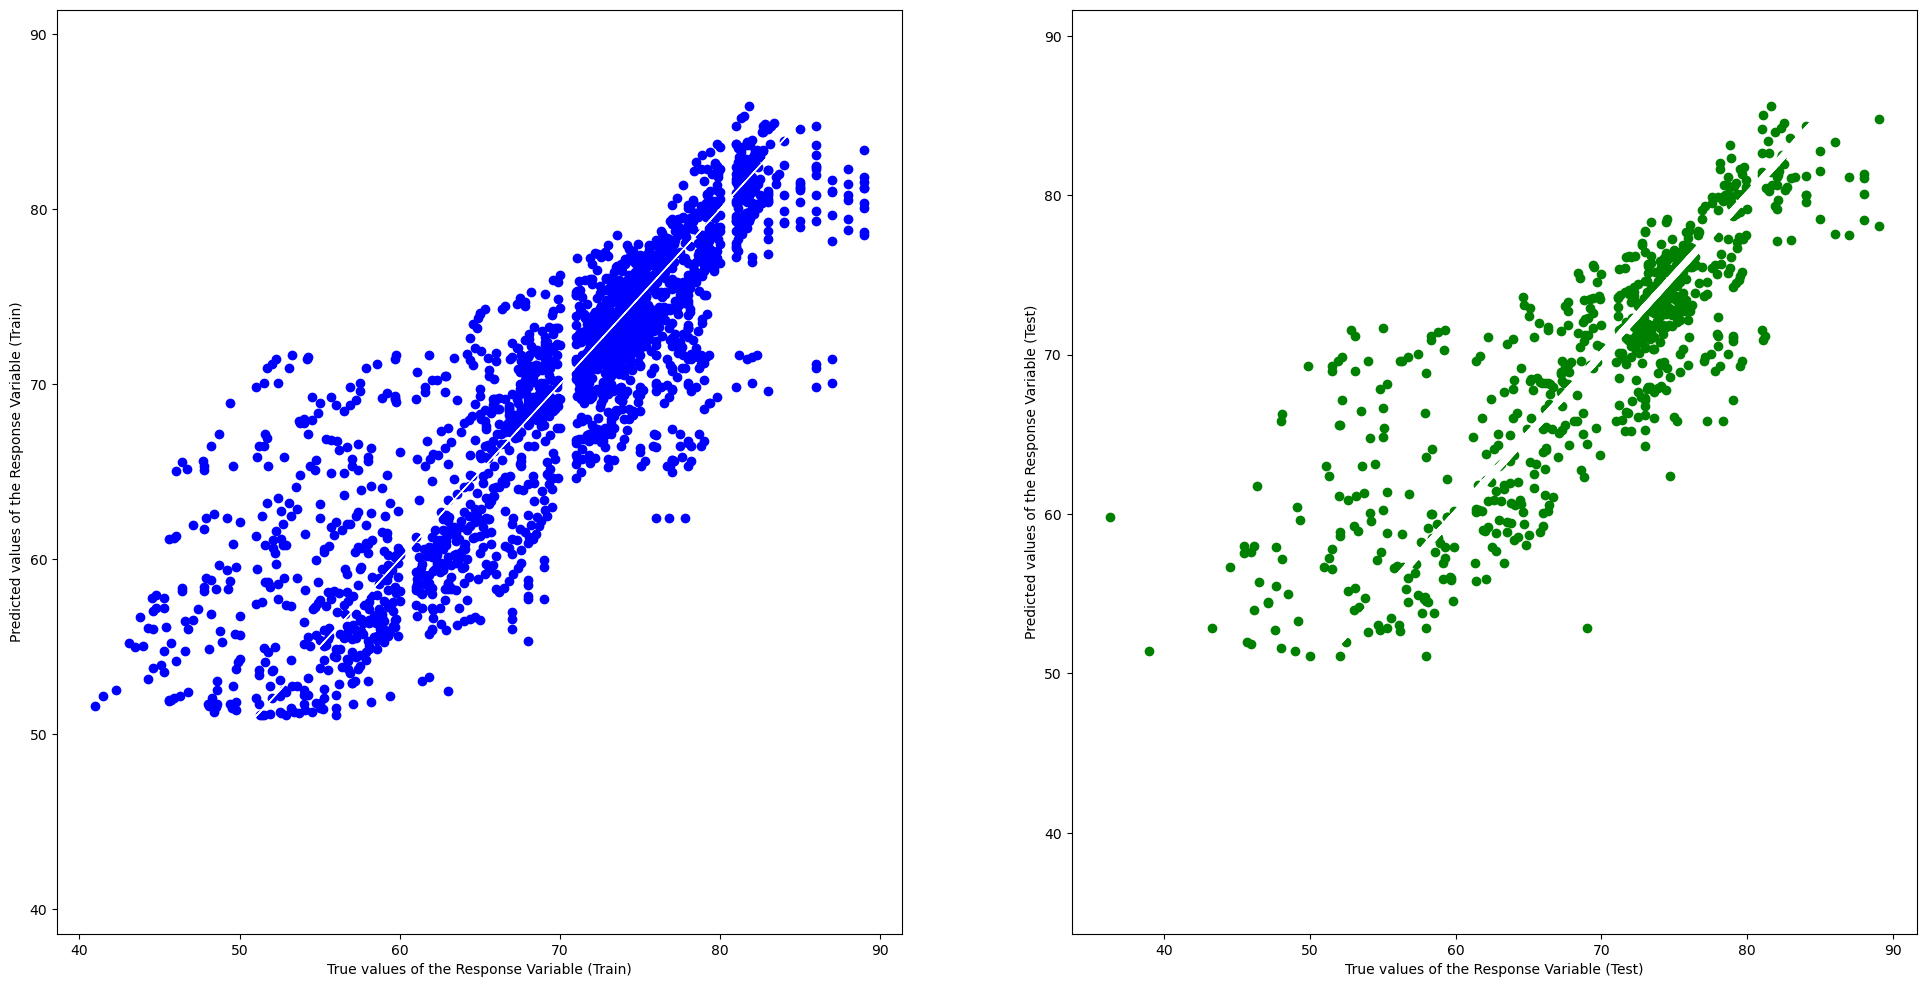

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7338583359380221
Mean Squared Error (MSE) 	: 23.936231804310182

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.695005836712407
Mean Squared Error (MSE) 	: 27.429058220508526



In [79]:
# DEGREE OF 4
# Polynomial Regression using Train Data
poly = PolynomialFeatures(degree=4)

X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)

linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_poly_train, y_train)        # train the linear regression model

# Coefficients of the Polynomial Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
poly_predictors = poly.get_feature_names(X_train.columns)
print(pd.DataFrame(list(zip(poly_predictors, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_poly_train)
y_test_pred = linreg.predict(X_poly_test)


# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_poly_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_poly_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Intercept of Regression 	: b =  [46560.53045386]
Coefficients of Regression 	: a =  [[ 0.00000000e+00 -1.17346777e+06  1.33455009e+07 -9.03457455e+07
   4.05212758e+08 -1.26830414e+09  2.84123273e+09 -4.59197625e+09
   5.31695080e+09 -4.30398552e+09  2.31344901e+09 -7.41833503e+08
   1.07381522e+08]]

                            Predictors  Coefficients
0                                    1  0.000000e+00
1      income_composition_of_resources -1.173468e+06
2    income_composition_of_resources^2  1.334550e+07
3    income_composition_of_resources^3 -9.034575e+07
4    income_composition_of_resources^4  4.052128e+08
5    income_composition_of_resources^5 -1.268304e+09
6    income_composition_of_resources^6  2.841233e+09
7    income_composition_of_resources^7 -4.591976e+09
8    income_composition_of_resources^8  5.316951e+09
9    income_composition_of_resources^9 -4.303986e+09
10  income_composition_of_resources^10  2.313449e+09
11  income_composition_of_resources^11 -7.418335e+08
12  inco

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


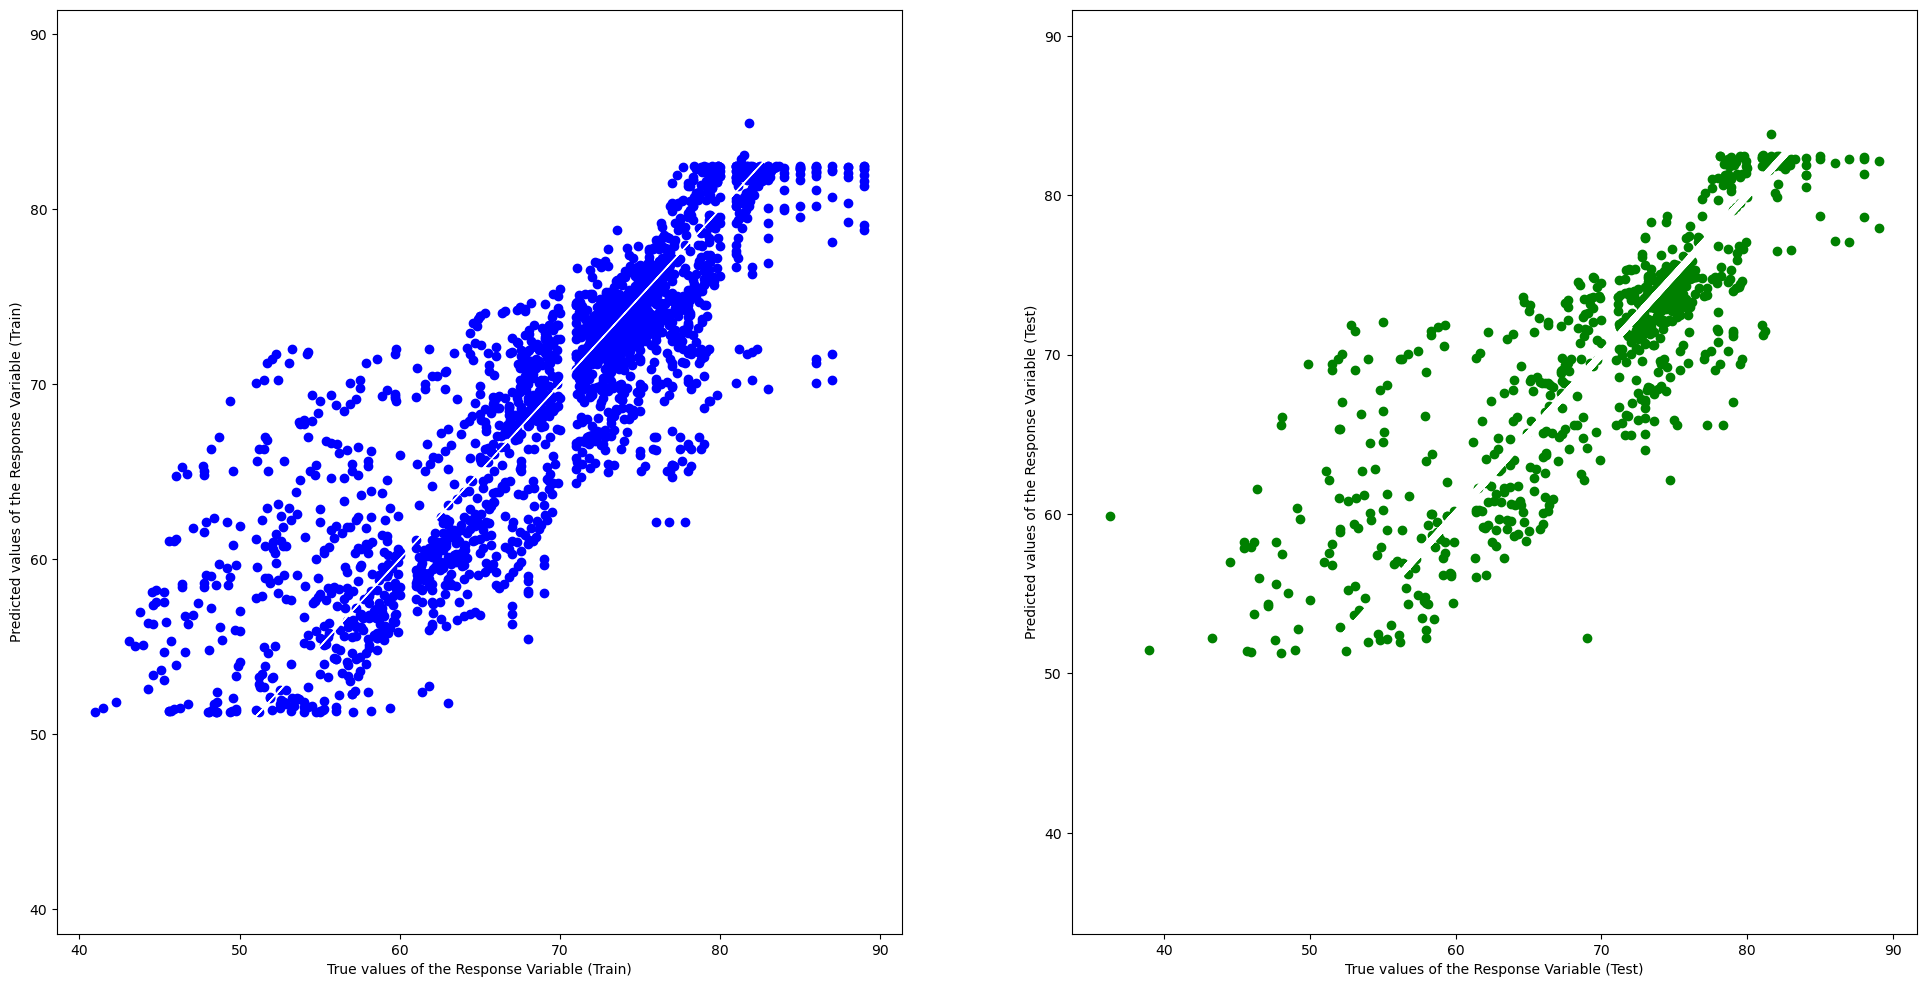

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7369958745368955
Mean Squared Error (MSE) 	: 23.654048060316924

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6937575491809859
Mean Squared Error (MSE) 	: 27.541320537289323



In [80]:
# DEGREE OF 12
# Polynomial Regression using Train Data
poly = PolynomialFeatures(degree=12)

X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)

linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_poly_train, y_train)        # train the linear regression model

# Coefficients of the Polynomial Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
poly_predictors = poly.get_feature_names(X_train.columns)
print(pd.DataFrame(list(zip(poly_predictors, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_poly_train)
y_test_pred = linreg.predict(X_poly_test)


# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_poly_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_poly_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Conclusion:
When comparing the training of differring degrees:
<br>Explained Variance (R^2) and Mean Squared Error (MSE) are to be taken account.

### Explained Variance (R^2): 
<br>The R^2 value is a statistical measure of how well the model fits the data, and a high R^2 value indicates that the model explains the variability of the data well. However, it is important to note that the R^2 value does not necessarily imply accuracy of prediction.

If the R^2 value for the training set is much higher than the test set, it indicates that the model is overfitting the data and is not generalizing well to new data. On the other hand, if the R^2 value for the test set is much lower than the training set, it indicates that the model is underfitting the data and is not capturing the underlying patterns in the data. Therefore, if the R^2 value for both the training set and the test set are similar, it indicates that the model is performing well and is likely to generalize well to new, unseen data.

### Mean Squared Error (MSE): 
<br>MSE is the average of the squared differences between the predicted values and the actual values. It measures the average magnitude of the errors in the predictions. Lower values of MSE indicate better performance of the model.

<br>
<br>Degree of 2:
<br>Goodness of Fit of Model 	Test Dataset
<br>Explained Variance (R^2) 	: 0.69381
<br>Mean Squared Error (MSE) 	: 27.536

Degree of 4:
Goodness of Fit of Model 	Test Dataset
<br>Explained Variance (R^2)    : 0.69500 
<br>Mean Squared Error (MSE) 	: 27.429

Degree of 12:
Goodness of Fit of Model 	Test Dataset
<br>Explained Variance (R^2) 	: 0.69375
<br>Mean Squared Error (MSE) 	: 27.541

Degree of 4 shows the highest Explained Variance and lowest Mean Square Error among the 3. Thus the most well fitted and most predictive degree is of degree 4.

### Degree 4 Training vs testing:

All degrees have a difference in Training and test R^2 of around 0.04, thus the model is performing well and is likely to generalize well to new, unseen data.


### Overall, Polynomial regression with a degree of 4 is a good model for the prediction of "Life expectancy" with "Income composition of resources".
<br>Explained Variance (R^2)    : 0.69500  Mean Squared Error (MSE) 	: 27.429

<br>Could there be a better variable and better model to use for prediction ? Perhaps, more exploration with other models is needed